In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

In [8]:
def BandRejectFilter(y, sr, lowcut, highcut, order):
    nyq = 0.5 * sr
    low = lowcut/nyq
    high = highcut/nyq
    b, a = signal.butter(order, [low, high], btype='bandstop')
    
    filt_signal = signal.filtfilt(b, a, y)
    return filt_signal

### TEST

In [9]:
freq1 = 60  # Hz
freq2 = 90  # Hz
sr = 1000  # samples per second
time = 1  # seconds
t = np.linspace(0, time, time * sr)

y = np.sin(2*np.pi*freq1*t) + np.sin(2*np.pi*freq2*t)
# y + random noise
yn = y * 0.3 * np.random.rand(len(t))
dt = 250  # observation

Text(0.5, 0, 't(s)')

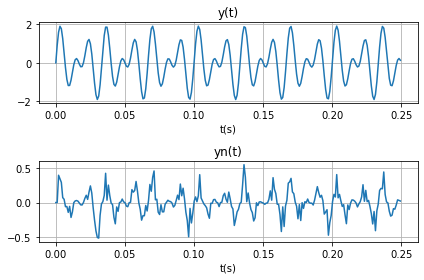

In [10]:
# plot
plt.figure(tight_layout=True)

plt.subplot(211)
plt.plot(t[:dt], y[:dt])
plt.title('y(t)')
plt.grid()
plt.xlabel('t(s)')

plt.subplot(212)
plt.plot(t[:dt], yn[:dt])
plt.title('yn(t)')
plt.grid()
plt.xlabel('t(s)')

In [11]:
# fft
Y = np.abs(np.fft.fft(y))
Yn = np.abs(np.fft.fft(yn))
f = np.arange(0, len(Y)) * sr/len(Y)
df = int(200 * len(y) / sr)

Text(0.5, 0, 'f(Hz)')

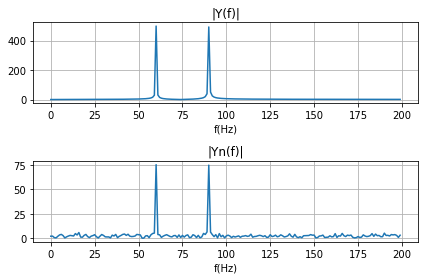

In [12]:
#fft plots
plt.figure(tight_layout=True)

plt.subplot(211)
plt.plot(f[:df], Y[:df])
plt.title('|Y(f)|')
plt.grid()
plt.xlabel('f(Hz)')

plt.subplot(212)
plt.plot(f[:df], Yn[:df])
plt.title('|Yn(f)|')
plt.grid()
plt.xlabel('f(Hz)')

In [13]:
# filter bandstop - reject 90 Hztop)
y_filt = BandRejectFilter(y, sr, 87, 93, 4)
yn_filt = BandRejectFilter(yn, sr, 87, 93, 4)

Text(0.5, 0, 't(s)')

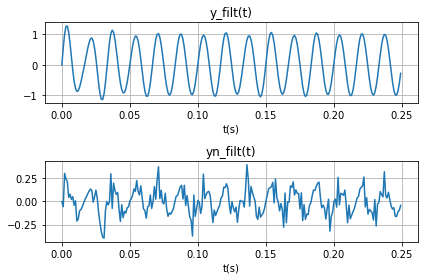

In [14]:
# filtered signal
plt.figure(tight_layout=True)

plt.subplot(211)
plt.plot(t[:dt], y_filt[:dt])
plt.title('y_filt(t)')
plt.grid()
plt.xlabel('t(s)')

plt.subplot(212)
plt.plot(t[:dt], yn_filt[:dt])
plt.title('yn_filt(t)')
plt.grid()
plt.xlabel('t(s)')

In [15]:
# fft
Y = np.abs(np.fft.fft(y_filt))
Yn = np.abs(np.fft.fft(yn_filt))
f = np.arange(0, len(Y)) * sr/len(Y)
df = int(200 * len(y_filt) / sr)


Text(0.5, 0, 'f(Hz)')

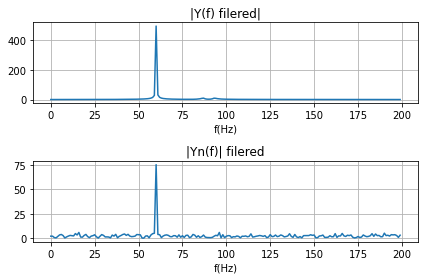

In [16]:
#fft plots
plt.figure(tight_layout=True)

plt.subplot(211)
plt.plot(f[:df], Y[:df])
plt.title('|Y(f) filered|')
plt.grid()
plt.xlabel('f(Hz)')

plt.subplot(212)
plt.plot(f[:df], Yn[:df])
plt.title('|Yn(f)| filered')
plt.grid()
plt.xlabel('f(Hz)')